<a href="https://colab.research.google.com/github/Harranu/WHR-Repository/blob/main/World_Happiness_Project_Code_Latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Open my Google Drive

In [35]:
from itertools import groupby
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


Import needed Libraries

In [36]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans

Read Dataframe and Explore Data

In [37]:
# Read the dataset into a dataframe
whr_df = pd.read_csv('/content/drive/My Drive/WH Project Latest/Datasets/world-happiness-report.csv')
whr_df_2021 = pd.read_csv('/content/drive/My Drive/WH Project Latest/Datasets/world-happiness-report-2021.csv')
whr_df_2022_2024 = pd.read_csv("/content/drive/My Drive/WH Project Latest/Datasets/world-happiness-report-new-2024.csv")
# Select rows where the 'year' column is between 2022 and 2024 (I will use the dataset of 2022-2024 to test our trained model)
whr_df_2022_2024 = whr_df_2022_2024[(whr_df_2022_2024['year'] >= 2022) & (whr_df_2022_2024['year'] <= 2024)]


##  Data Exploration and Quality Check ###

def datacheck_df(dataframe, head=5):
    print("__________________________ Data Information __________________________ ")
    print(dataframe.info())
    print("__________________________ Dataframe Head __________________________ ")
    display(dataframe.head(head))
    print("__________________________ Dataframe Tail __________________________ ")
    display(dataframe.tail(head))
    print("__________________________ Missing Values __________________________ ")
    print(dataframe.isnull().sum())
    print("__________________________ Duplicates __________________________ ")
    print(dataframe.duplicated().values.any().sum())
    print("__________________________ Statistics __________________________ ")
    display(dataframe.describe())
    print("_____________________________________________________________________ ")

print('World Happiness Report 2005-2020 Data Exploration and Quality Check')
datacheck_df(whr_df)

World Happiness Report 2005-2020 Data Exploration and Quality Check
__________________________ Data Information __________________________ 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


__________________________ Dataframe Tail __________________________ 


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1944,Zimbabwe,2016,3.735,7.984,0.768,54.4,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.0,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.6,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.2,0.632,-0.064,0.831,0.716,0.235
1948,Zimbabwe,2020,3.160,7.829,0.717,56.8,0.643,-0.009,0.789,0.703,0.346


__________________________ Missing Values __________________________ 
Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64
__________________________ Duplicates __________________________ 
0
__________________________ Statistics __________________________ 


,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


_____________________________________________________________________ 


In [38]:
print('World Happiness Report 2021 Data Exploration and Quality Check')
datacheck_df(whr_df_2021)

World Happiness Report 2021 Data Exploration and Quality Check
__________________________ Data Information __________________________ 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy  

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


__________________________ Dataframe Tail __________________________ 


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205
148,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895


__________________________ Missing Values __________________________ 
Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residua

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.00,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.43,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.00,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.43,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.43,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.43,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.43,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.43,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


_____________________________________________________________________ 


In [39]:
print('World Happiness Report 2022-2024  Data Exploration and Quality Check')
datacheck_df(whr_df_2022_2024)

World Happiness Report 2022-2024  Data Exploration and Quality Check
__________________________ Data Information __________________________ 
<class 'pandas.core.frame.DataFrame'>
Index: 278 entries, 13 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      278 non-null    object 
 1   year                              278 non-null    int64  
 2   Life Ladder                       278 non-null    float64
 3   Log GDP per capita                264 non-null    float64
 4   Social support                    278 non-null    float64
 5   Healthy life expectancy at birth  271 non-null    float64
 6   Freedom to make life choices      274 non-null    float64
 7   Generosity                        264 non-null    float64
 8   Perceptions of corruption         266 non-null    float64
 9   Positive affect                   278 non-null    float64
 

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
13,Afghanistan,2022,1.281,NaN,0.228,54.875,0.368,NaN,0.733,0.206,0.576
14,Afghanistan,2023,1.446,NaN,0.368,55.200,0.228,NaN,0.738,0.261,0.460
29,Albania,2022,5.212,9.649,0.724,69.175,0.802,-0.070,0.846,0.547,0.255
30,Albania,2023,5.445,9.689,0.691,69.200,0.872,0.068,0.855,0.597,0.314
41,Algeria,2022,5.538,9.323,0.783,66.700,0.440,-0.045,0.611,0.583,0.259


__________________________ Dataframe Tail __________________________ 


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
2327,Yemen,2023,3.532,NaN,0.825,56.600,0.583,NaN,0.771,0.447,0.341
2343,Zambia,2022,3.728,8.101,0.717,55.675,0.889,-0.009,0.716,0.660,0.309
2344,Zambia,2023,3.686,8.115,0.664,56.100,0.854,0.092,0.814,0.653,0.359
2361,Zimbabwe,2022,3.296,7.670,0.666,54.525,0.652,-0.073,0.753,0.641,0.191
2362,Zimbabwe,2023,3.572,7.679,0.694,55.000,0.735,-0.069,0.757,0.610,0.179


__________________________ Missing Values __________________________ 
Country name                         0
year                                 0
Life Ladder                          0
Log GDP per capita                  14
Social support                       0
Healthy life expectancy at birth     7
Freedom to make life choices         4
Generosity                          14
Perceptions of corruption           12
Positive affect                      0
Negative affect                      0
dtype: int64
__________________________ Duplicates __________________________ 
0
__________________________ Statistics __________________________ 


,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,278.000000,278.000000,264.000000,278.000000,271.000000,274.000000,264.000000,266.000000,278.000000,278.000000
mean,2022.496403,5.559536,9.522394,0.794396,64.997140,0.786088,0.031614,0.724628,0.651683,0.294097
std,0.500889,1.183797,1.151340,0.134076,5.711992,0.121411,0.162030,0.172881,0.110426,0.093525
min,2022.000000,1.281000,7.032000,0.228000,46.150000,0.228000,-0.318000,0.153000,0.206000,0.095000
25%,2022.000000,4.673000,8.619750,0.716250,60.600000,0.723000,-0.076250,0.663250,0.583000,0.228000
50%,2022.000000,5.860500,9.635500,0.830500,65.950000,0.798000,0.020500,0.768500,0.667500,0.284000
75%,2023.000000,6.435250,10.514000,0.891750,69.512500,0.875500,0.137250,0.846000,0.735500,0.358750
max,2023.000000,7.729000,11.676000,0.985000,74.600000,0.975000,0.600000,0.948000,0.843000,0.576000


_____________________________________________________________________ 


Data Clean and Preprocessing

In [40]:
### Data Clean and arrange ###

# Columns to drop in WHR dataframe
whr_df = whr_df.drop(['Positive affect', 'Negative affect'], axis = 1)

# Columns to drop in WHR2021 and create a new column called year in WHR2021 to correspond with WH and fill it with the value "2021"
whr_df_2021_not_needed_col = ['Ladder score in Dystopia', 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Ladder score in Dystopia', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Dystopia + residual']
whr_df_2021 = whr_df_2021.drop(columns = whr_df_2021_not_needed_col, axis = 1)
whr_df_2021['year'] = 2021

# WHR does not have regions so we map regions from WHR2021 to WHR to their corresponding countries
country_to_region = {}
for region in whr_df_2021['Regional indicator'].unique():
  countries_in_region = whr_df_2021[whr_df_2021['Regional indicator'] == region]['Country name'].tolist()
  for country in countries_in_region:
    country_to_region[country] = region
whr_df['Regional indicator'] = whr_df['Country name'].map(country_to_region)

# Some regions of some countries where missing during mapping, so we check manually for missing Regional indicator column in WHR and fill it for any corresponding country
missing_regions = {'Sub-Saharan Africa': ['Angola', 'Central African Republic', 'Congo (Kinshasa)', 'Somalia', 'Somaliland region', 'South Sudan', 'Sudan'],'Latin America and Caribbean': ['Cuba', 'Trinidad and Tobago', 'Suriname', 'Belize', 'Guyana'], 'Middle East and North Africa': ['Djibouti', 'Qatar', 'Oman', 'Syria', 'Bhutan'], 'South Asia':['Maldives']}
country_to_region = {country: region for region, countries in missing_regions.items() for country in countries}
whr_df['Regional indicator'] = whr_df.apply(lambda row: country_to_region.get(row['Country name'], row['Regional indicator']),axis=1)

# Rename following columns, in order to merge both datasets without missing any value, then merge the two dataframes
whr_df.rename(columns={'Life Ladder': 'Ladder score', 'Log GDP per capita':'Logged GDP per capita', 'Healthy life expectancy at birth': 'Healthy life expectancy'}, inplace=True)
whr_df_merged = pd.concat([whr_df, whr_df_2021], ignore_index=True, axis = 0)

# Drop specified countries from the 'Country name'
# countries_to_drop = ['Cuba', 'Guyana', 'Maldives', 'Oman', 'Suriname']
# whr_df_merged = whr_df_merged[~whr_df_merged['Country name'].isin(countries_to_drop)]

# Some feattures have few missing values,  so we fill there missing values with the mean of column based on country/Regional indicator
fill_missing_values = ['Logged GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
for column in fill_missing_values:
    # whr_df_merged[column] = whr_df_merged.groupby('Country name')[column].transform(lambda x: x.fillna(x.mean()))
    whr_df_merged[column] = whr_df_merged.groupby('Regional indicator')[column].transform(lambda x: x.fillna(x.mean()))

# Rename the preprocessed and clean dataset
whr_df = whr_df_merged

# Change date format to string
whr_df['year'] = whr_df['year'].astype(str)

# # Standardize the features
# scaler = StandardScaler()
# numeric_columns = whr_df.select_dtypes(include=['float64']).columns   # only float no date (year) or string
# whr_df[numeric_columns] = scaler.fit_transform(whr_df[numeric_columns])

# (Opional) Activate/Deactivate interactive data-table display, so that we can be able to apply advance filter if we wish
from google.colab import data_table
data_table.enable_dataframe_formatter()
#data_table.disable_dataframe_formatter()

display(whr_df.head())

,Country name,year,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Regional indicator
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,South Asia
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,South Asia
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,South Asia
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,South Asia
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,South Asia


Dataset statistics and info after preprocessing

In [41]:
# Data informaton and statistics after preprocessing

def datacheck_df(dataframe, head=5):
    print("__________________________ Data Information __________________________ ")
    print(dataframe.info())
    print("__________________________ Missing Values __________________________ ")
    print(dataframe.isnull().sum())
    print("__________________________ Duplicates __________________________ ")
    print(dataframe.duplicated().values.any().sum())
    print("__________________________ Statistics __________________________ ")
    whr_df_statistic = dataframe.drop('year', axis=1)
    display(whr_df_statistic.describe())
    print("_____________________________________________________________________ ")

# print('World Happiness Report 2021 Data Exploration and Quality Check')
datacheck_df(whr_df)

# whr_df



__________________________ Data Information __________________________ 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  2098 non-null   object 
 1   year                          2098 non-null   object 
 2   Ladder score                  2098 non-null   float64
 3   Logged GDP per capita         2098 non-null   float64
 4   Social support                2098 non-null   float64
 5   Healthy life expectancy       2098 non-null   float64
 6   Freedom to make life choices  2098 non-null   float64
 7   Generosity                    2098 non-null   float64
 8   Perceptions of corruption     2098 non-null   float64
 9   Regional indicator            2098 non-null   object 
dtypes: float64(7), object(3)
memory usage: 164.0+ KB
None
__________________________ Missing Values ____________

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,2098.000000,2098.000000,2098.000000,2098.000000,2098.000000,2098.000000,2098.000000
mean,5.471402,9.374526,0.812709,63.575679,0.745910,-0.001041,0.745506
std,1.112676,1.153227,0.117913,7.431138,0.139942,0.158512,0.181619
min,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000
25%,4.652250,8.464750,0.750000,58.915000,0.654250,-0.109000,0.696000
50%,5.392000,9.464500,0.834000,65.360000,0.766000,-0.026000,0.793000
75%,6.282500,10.360750,0.905000,68.800000,0.859000,0.084750,0.866000
max,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000


_____________________________________________________________________ 


In [42]:

# *** Lets clean the test dataset *** #

# Columns to drop in new WHR2022-2024
whr_df_2022_2024 = whr_df_2022_2024.drop(['Positive affect', 'Negative affect'], axis=1)

# Rename following feature columns to correspond on both datasets
whr_df_2022_2024.rename(columns={'Life Ladder': 'Ladder score', 'Log GDP per capita': 'Logged GDP per capita',
                                'Healthy life expectancy at birth': 'Healthy life expectancy'}, inplace=True)

# Rename following country columns to correspond on both datasets
whr_df_2022_2024['Country name'] = whr_df_2022_2024['Country name'].replace(
    {'Czechia': 'Czech Republic', 'State of Palestine': 'Palestinian Territories', 'Türkiye': 'Turkey'})

# Map countries to regions from WHRBase to WHR2005-2024 to their corresponding regions
country_to_region = {}
for region in whr_df['Regional indicator'].unique():
    countries_in_region = whr_df[whr_df['Regional indicator'] == region]['Country name'].tolist()
    for country in countries_in_region:
        country_to_region[country] = region
# Create Regional indicator column in WHR2005-2024 and assign its value based on mapping with country name to region from WHRBase
whr_df_2022_2024['Regional indicator'] = whr_df_2022_2024['Country name'].map(country_to_region)

# Check for missing rows on Regional indicator column in WHR2005-2023 and fill the missing regions to the country
missing_regions = {'Sub-Saharan Africa': ['Eswatini']}
country_to_region = {country: region for region, countries in missing_regions.items() for country in countries}
whr_df_2022_2024['Regional indicator'] = whr_df_2022_2024.apply(
    lambda row: country_to_region.get(row['Country name'], row['Regional indicator']), axis=1)

# Fill the missing numerical values of the features with the mean. Group by 'Country name'/'Regional indicator' and fill missing values based on mean of own country/regions
fill_missing_values = ['Logged GDP per capita', 'Social support', 'Healthy life expectancy',
                      'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
for column in fill_missing_values:
    # whr_df_2022_2024[column] = whr_df_2022_2024.groupby('Country name')[column].transform(lambda x: x.fillna(x.mean()))
    whr_df_2022_2024[column] = whr_df_2022_2024.groupby('Regional indicator')[column].transform(
        lambda x: x.fillna(x.mean()))

whr_df_2022_2024['year'] = whr_df_2022_2024['year'].astype(str)
# Save the clean new/test dataset to my disk for further analysis
file_path = 'cleaned-world-happiness-report-2022-2024.csv'
whr_df_2022_2024.to_csv(file_path, index=False, sep=',', encoding='utf-8', header=True)

In [43]:
# Test Data 2022-2024 informaton and statistics after preprocessing

def datacheck_df(dataframe, head=5):
    print("__________________________ Data Information __________________________ ")
    print(dataframe.info())
    print("__________________________ Missing Values __________________________ ")
    print(dataframe.isnull().sum())
    print("__________________________ Duplicates __________________________ ")
    print(dataframe.duplicated().values.any().sum())
    print("__________________________ Statistics __________________________ ")
    whr_df_statistic = dataframe.drop('year', axis=1)
    display(whr_df_statistic.describe())
    print("_____________________________________________________________________ ")

# print('World Happiness Report 2021 Data Exploration and Quality Check')
datacheck_df(whr_df_2022_2024)


__________________________ Data Information __________________________ 
<class 'pandas.core.frame.DataFrame'>
Index: 278 entries, 13 to 2362
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  278 non-null    object 
 1   year                          278 non-null    object 
 2   Ladder score                  278 non-null    float64
 3   Logged GDP per capita         278 non-null    float64
 4   Social support                278 non-null    float64
 5   Healthy life expectancy       278 non-null    float64
 6   Freedom to make life choices  278 non-null    float64
 7   Generosity                    278 non-null    float64
 8   Perceptions of corruption     278 non-null    float64
 9   Regional indicator            278 non-null    object 
dtypes: float64(7), object(3)
memory usage: 23.9+ KB
None
__________________________ Missing Values __________________

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000
mean,5.559536,9.539833,0.794396,65.079105,0.785824,0.030747,0.726222
std,1.183797,1.133000,0.134076,5.667150,0.120954,0.158750,0.169355
min,1.281000,7.032000,0.228000,46.150000,0.228000,-0.318000,0.153000
25%,4.673000,8.669250,0.716250,60.700000,0.722250,-0.071629,0.668250
50%,5.860500,9.643000,0.830500,66.100000,0.798000,0.018000,0.770500
75%,6.435250,10.499000,0.891750,69.613393,0.874000,0.136000,0.840750
max,7.729000,11.676000,0.985000,74.600000,0.975000,0.600000,0.948000


_____________________________________________________________________ 


Explore and Analyze the Data: Plot and Graphs

In [44]:
import plotly.express as px
import matplotlib.pyplot as plt

# Choropleth map of Ladder score distribution over the years by country
whr_df = whr_df.sort_values(by='year', ascending=True)
fig = px.choropleth(
    data_frame = whr_df,
    locations = 'Country name',
    locationmode = 'country names',
    color = 'Ladder score',
    color_continuous_scale = 'turbo',
    animation_frame = 'year',
    title = 'Global Happiness Scores Map Over Time By Country',
    labels = {'Ladder score':'Happiness Score'},
    projection = 'natural earth',
    hover_data = ['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
)
fig.update_layout(
        autosize=True,
        margin = dict(l=0, r=0, b=50, t=50,pad=4,autoexpand=True
            ),
        width=800, height=600,
    )
fig.show()

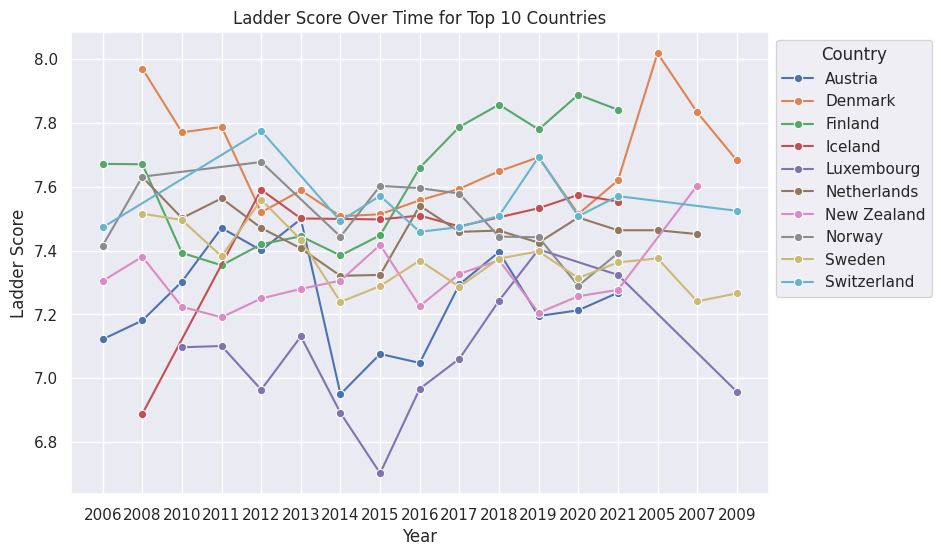

In [45]:
# Ladder score over time for top 10 countries

whr_df_grouped = whr_df.groupby(['Country name', 'year'])['Ladder score'].sum().reset_index()
latest_year = whr_df_grouped['year'].max()
top_10_countries = whr_df_grouped[whr_df_grouped['year'] == latest_year].nlargest(10, 'Ladder score')['Country name']
top_10_data = whr_df_grouped[whr_df_grouped['Country name'].isin(top_10_countries)]
plt.figure(figsize=(9, 6))
sns.lineplot(x='year', y='Ladder score', hue='Country name', data=top_10_data, marker='o')
plt.title('Ladder Score Over Time for Top 10 Countries')
plt.xlabel('Year')
plt.ylabel('Ladder Score')
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

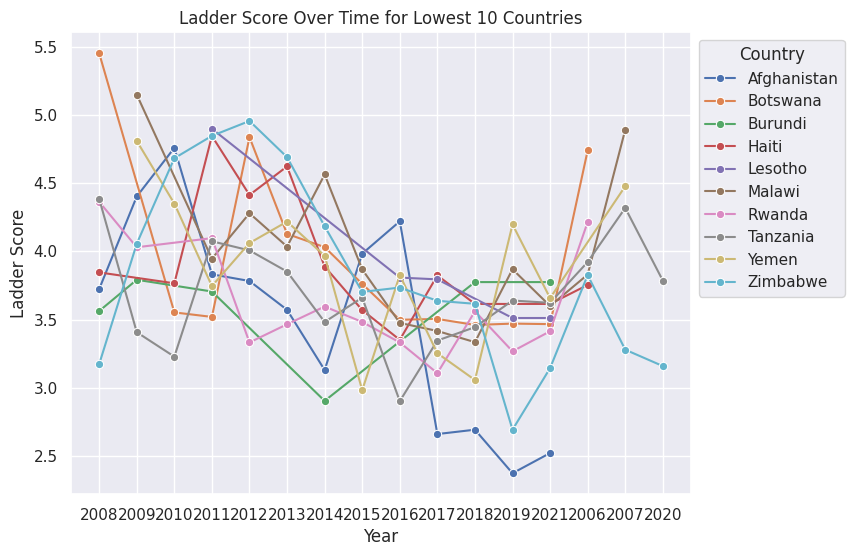

In [46]:
# Ladder score over time for lowest 10 countries

whr_df_grouped = whr_df.groupby(['Country name', 'year'])['Ladder score'].sum().reset_index()
latest_year = whr_df_grouped['year'].max()
lowest_10_countries = whr_df_grouped[whr_df_grouped['year'] == latest_year].nsmallest(10, 'Ladder score')['Country name']
lowest_10_data = whr_df_grouped[whr_df_grouped['Country name'].isin(lowest_10_countries)]
plt.figure(figsize=(8, 6))
sns.lineplot(x='year', y='Ladder score', hue='Country name', data=lowest_10_data, marker='o')
plt.title('Ladder Score Over Time for Lowest 10 Countries')
plt.xlabel('Year')
plt.ylabel('Ladder Score')
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

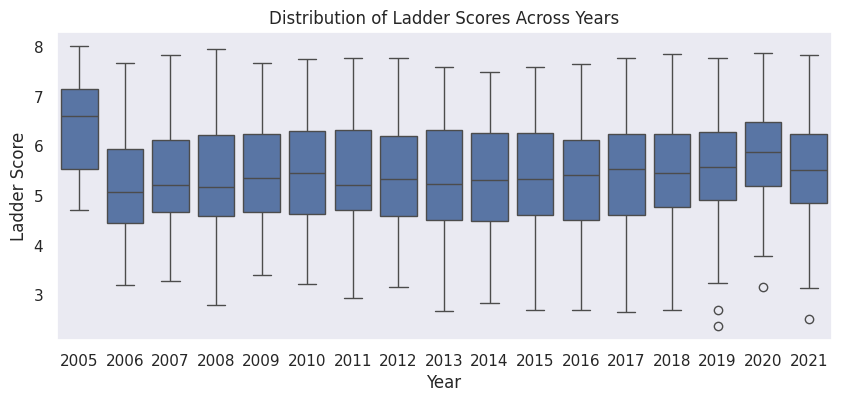

In [47]:
# Box plot of Ladder score distribution for each year

plt.figure(figsize=(10, 4))
sns.boxplot(x='year', y='Ladder score', data=whr_df)
plt.title('Distribution of Ladder Scores Across Years')
plt.xlabel('Year')
plt.ylabel('Ladder Score')
plt.grid(False)
plt.show()

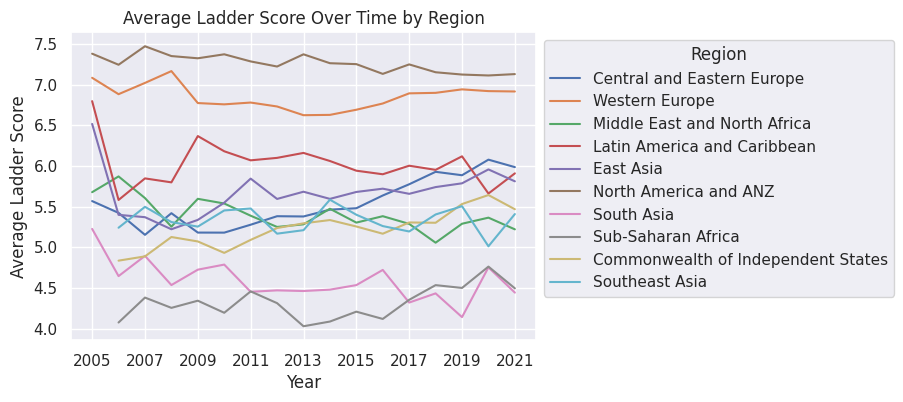

In [48]:
# Line plot of average Ladder score over time for each region

# Convert 'year' column to integers
whr_df['year'] = whr_df['year'].astype(int)
plt.figure(figsize=(6, 4))
for region in whr_df['Regional indicator'].unique():
    region_data = whr_df[whr_df['Regional indicator'] == region]
    avg_ladder_score = region_data.groupby('year')['Ladder score'].mean()
    plt.plot(avg_ladder_score.index, avg_ladder_score.values, label=region)

plt.title('Average Ladder Score Over Time by Region')
plt.xlabel('Year')
plt.ylabel('Average Ladder Score')
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

# Set x-axis ticks to 2-year intervals
plt.xticks(ticks=range(min(whr_df['year']), max(whr_df['year']) + 1, 2))

plt.show()

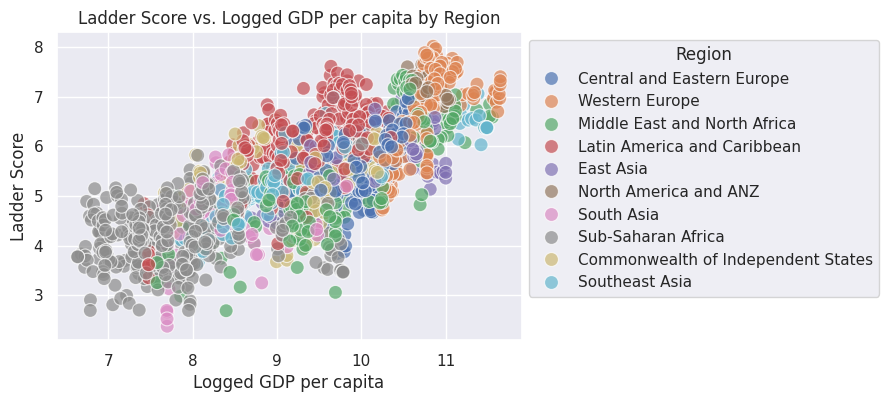

In [49]:
# Scatter plot of Ladder score vs. Logged GDP per capita, colored by Regional indicator

plt.figure(figsize=(6, 4))
sns.scatterplot(x='Logged GDP per capita', y='Ladder score', hue='Regional indicator', data=whr_df, s=100, alpha=0.7)
plt.title('Ladder Score vs. Logged GDP per capita by Region')
plt.xlabel('Logged GDP per capita')
plt.ylabel('Ladder Score')
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

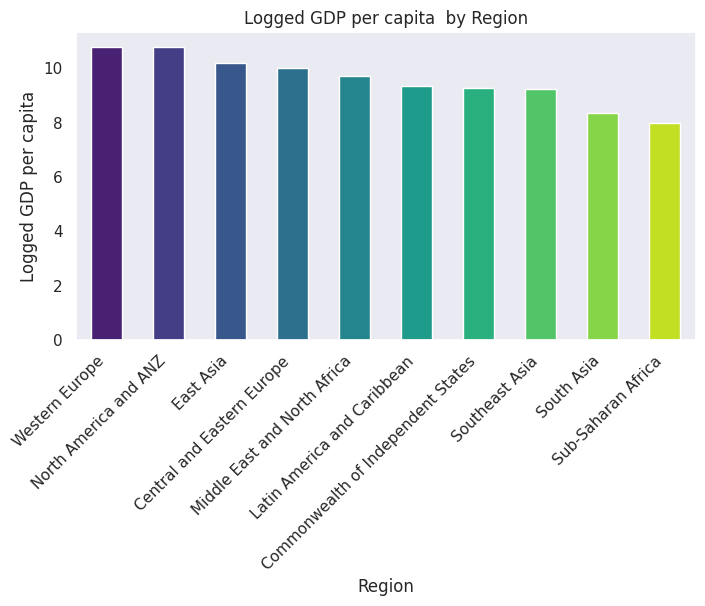

In [50]:
# Bar plot of Logged GDP per capita by region

plt.figure(figsize=(8, 4))
regional_gdp = whr_df.groupby('Regional indicator')['Logged GDP per capita'].mean().sort_values(ascending=False)
regional_gdp.plot(kind='bar', color=sns.color_palette('viridis', len(regional_gdp)))
plt.title('Logged GDP per capita  by Region')
plt.xlabel('Region')
plt.ylabel('Logged GDP per capita')
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.show()

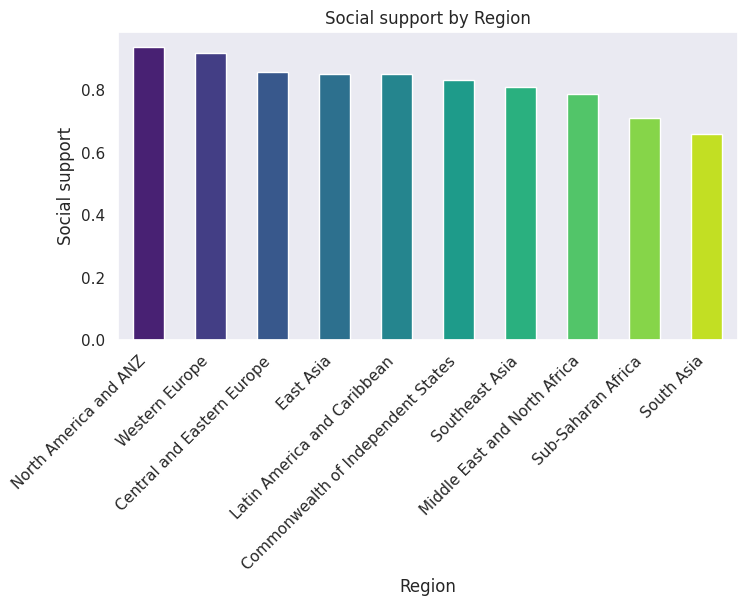

In [51]:
# Bar plot of average Social support by region

plt.figure(figsize=(8, 4))
regional_ss = whr_df.groupby('Regional indicator')['Social support'].mean().sort_values(ascending=False)
regional_ss.plot(kind='bar', color=sns.color_palette('viridis', len(regional_ss)))
plt.title('Social support by Region')
plt.xlabel('Region')
plt.ylabel('Social support')
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.show()

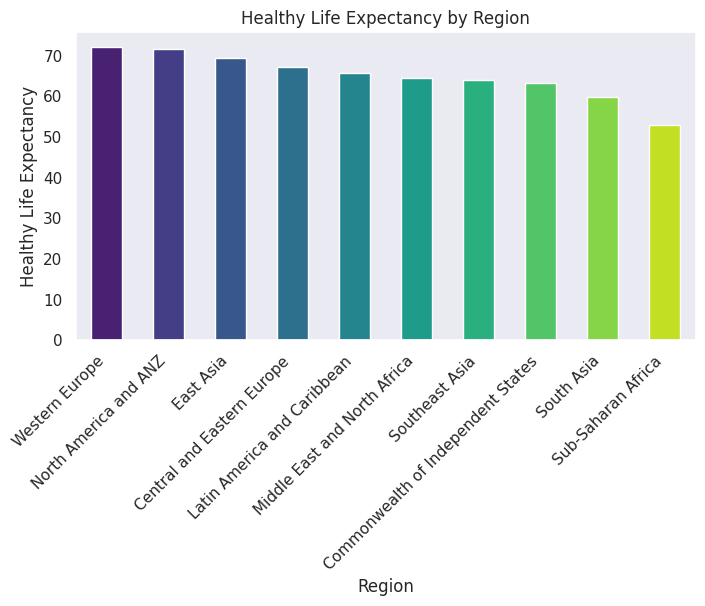

In [52]:
# Bar plot of Healthy life expectancy by region

plt.figure(figsize=(8, 4))
regional_health = whr_df.groupby('Regional indicator')['Healthy life expectancy'].mean().sort_values(ascending=False)
regional_health.plot(kind='bar', color=sns.color_palette('viridis', len(regional_health)))
plt.title('Healthy Life Expectancy by Region')
plt.xlabel('Region')
plt.ylabel('Healthy Life Expectancy')
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.show()

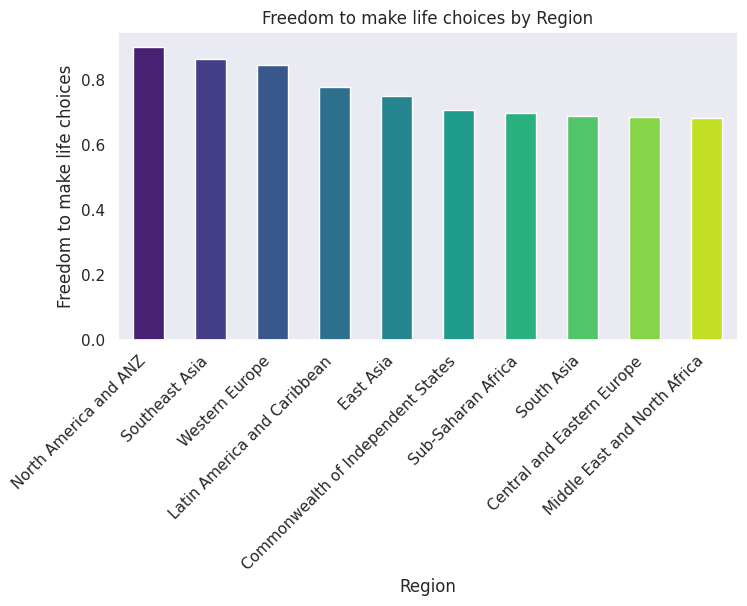

In [53]:
# Bar plot of Freedom to make life choices by region

plt.figure(figsize=(8, 4))
regional_fmlc = whr_df.groupby('Regional indicator')['Freedom to make life choices'].mean().sort_values(ascending=False)
regional_fmlc.plot(kind='bar', color=sns.color_palette('viridis', len(regional_fmlc)))
plt.title('Freedom to make life choices by Region')
plt.xlabel('Region')
plt.ylabel('Freedom to make life choices')
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.show()

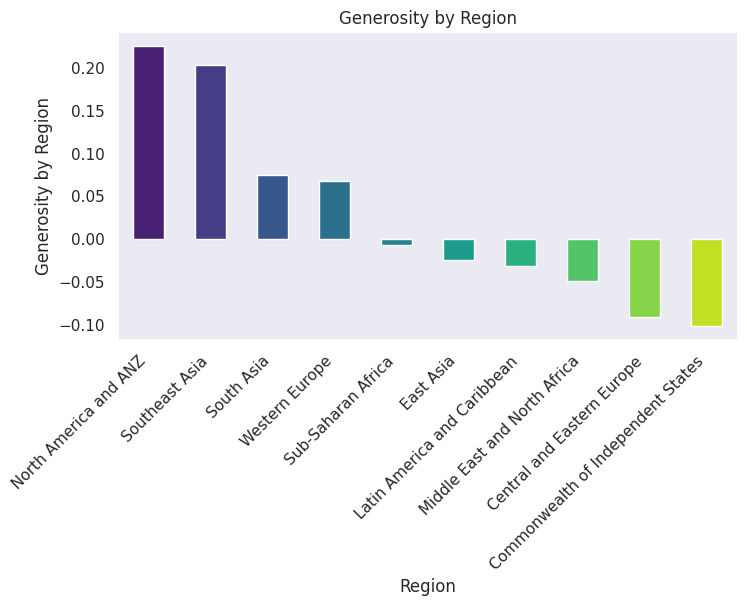

In [54]:
# Bar plot of Generosity by region

plt.figure(figsize=(8, 4))
regional_generosity = whr_df.groupby('Regional indicator')['Generosity'].mean().sort_values(ascending=False)
regional_generosity.plot(kind='bar', color=sns.color_palette('viridis', len(regional_generosity)))
plt.title('Generosity by Region')
plt.xlabel('Region')
plt.ylabel('Generosity by Region')
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.show()

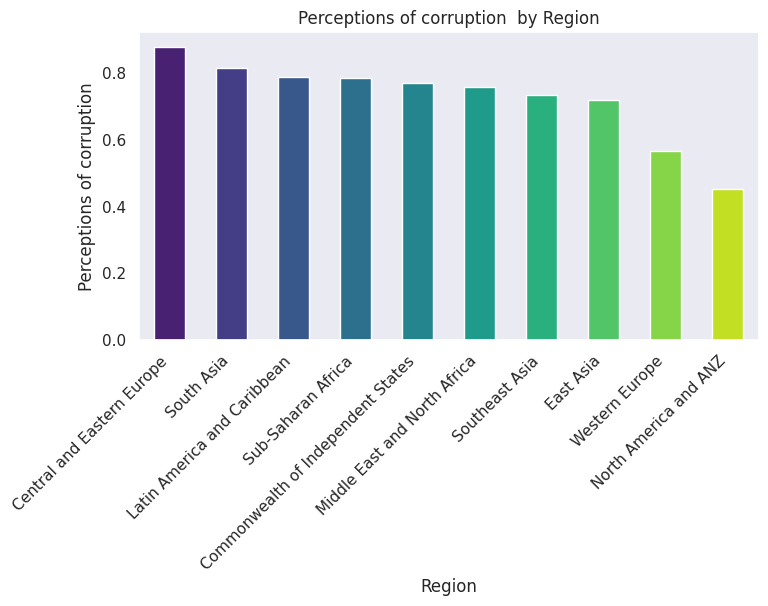

In [55]:
# Bar plot of Perceptions of corruption by region

plt.figure(figsize=(8, 4))
regional_pc = whr_df.groupby('Regional indicator')['Perceptions of corruption'].mean().sort_values(ascending=False)
regional_pc.plot(kind='bar', color=sns.color_palette('viridis', len(regional_pc)))
plt.title('Perceptions of corruption  by Region')
plt.xlabel('Region')
plt.ylabel('Perceptions of corruption')
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.show()

Distribution and correlation of the features/attributes and there importance to World Happiness

Figure 13


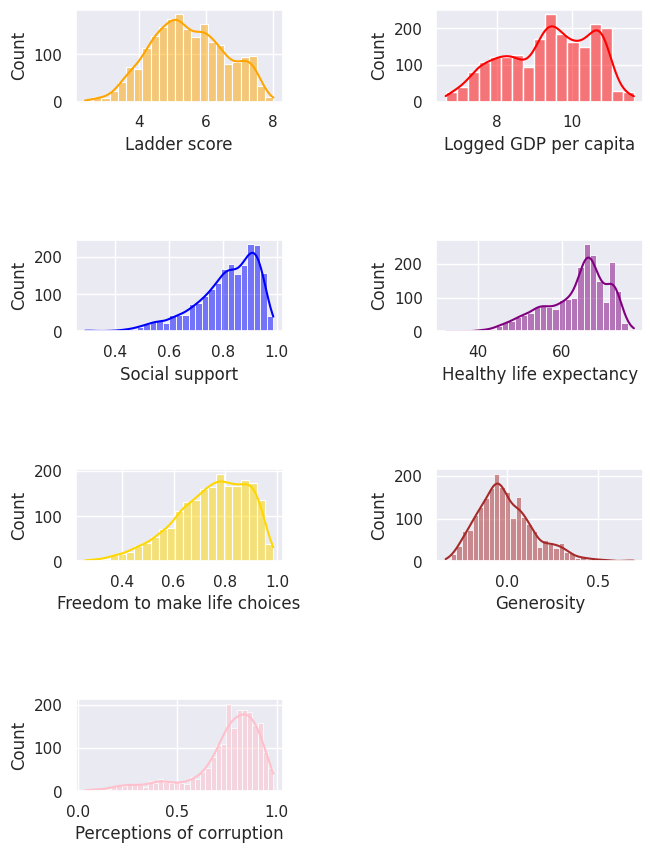

In [56]:
# Drop not needed features before checking the distrution and correlation of the Variables and there importance to the World happiness
whr_df_cor = whr_df.drop(['Country name', 'year', 'Regional indicator'], axis=1)

# create subplots
fig = plt.figure(figsize=(8,10))

# Create histograms of distribution of data for all features using seaborn
plt.subplot(4,2,1)
sns.histplot(data=whr_df_cor, x='Ladder score', color='orange', kde=True)
plt.ylabel('Count')

plt.subplot(4,2,2)
sns.histplot(data=whr_df_cor, x='Logged GDP per capita', color='red', kde=True)
plt.ylabel('Count')

plt.subplot(4,2,3)
sns.histplot(data=whr_df_cor, x='Social support', color='blue',kde=True)
plt.ylabel('Count')

plt.subplot(4,2,4)
sns.histplot(data=whr_df_cor, x='Healthy life expectancy', color='purple',kde=True)
plt.ylabel('Count')

plt.subplot(4,2,5)
sns.histplot(data=whr_df_cor, x='Freedom to make life choices', color='gold',kde=True)
plt.ylabel('Count')

plt.subplot(4,2,6)
sns.histplot(data=whr_df_cor, x='Generosity', color='brown',kde=True)
plt.ylabel('Count')

plt.subplot(4,2,7)
sns.histplot(data=whr_df_cor, x='Perceptions of corruption', color='pink',kde=True)
plt.ylabel('Count')

#Abjust spacing between subplots
fig.tight_layout(pad=5.0)

# Show the plots
print("Figure 13")
plt.show()

In [57]:
# The correlation Table of the Variables and there importance to the World happiness
whr_df_cor = whr_df.drop(['Country name', 'year', 'Regional indicator'], axis=1)
feature_correlation = whr_df_cor.corr()
feature_correlation

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Ladder score,1.000000,0.785688,0.709785,0.741741,0.525554,0.176410,-0.420381
Logged GDP per capita,0.785688,1.000000,0.693840,0.847225,0.361341,-0.012526,-0.327525
Social support,0.709785,0.693840,1.000000,0.617540,0.410638,0.057922,-0.217544
Healthy life expectancy,0.741741,0.847225,0.617540,1.000000,0.384974,0.018883,-0.318617
Freedom to make life choices,0.525554,0.361341,0.410638,0.384974,1.000000,0.315488,-0.472683
Generosity,0.176410,-0.012526,0.057922,0.018883,0.315488,1.000000,-0.276964
Perceptions of corruption,-0.420381,-0.327525,-0.217544,-0.318617,-0.472683,-0.276964,1.000000


Figure 14


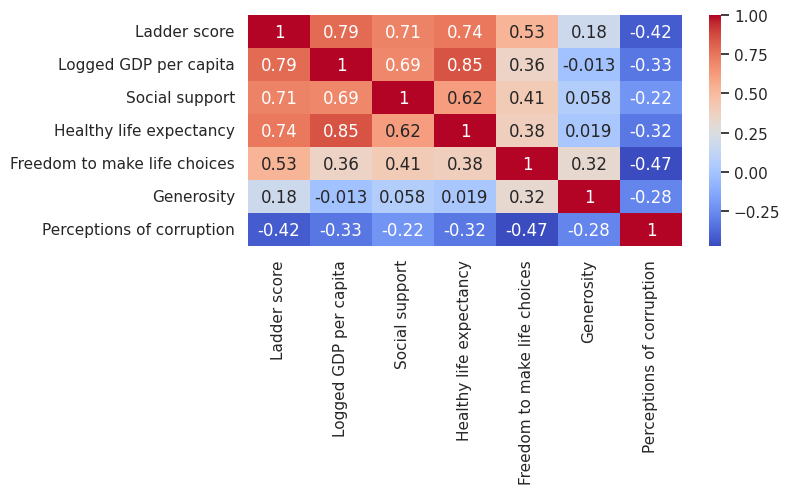

In [58]:
# Check the correlation heatmap
plt.figure(figsize=(7,3))
sns.heatmap(feature_correlation,annot=True,cmap='coolwarm')
print("Figure 14")
plt.show()

Supervised Machine Learning

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error, median_absolute_error, explained_variance_score
import joblib

# Define the features and target
X_explanatory = whr_df.drop(['Ladder score', 'Country name', 'year', 'Regional indicator'], axis=1)
y_target = whr_df['Ladder score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_explanatory, y_target, test_size=0.2, random_state=42) #stratify=X['Regional indicator']

# Identify numerical and categorical columns
numerical_cols = X_explanatory.select_dtypes(include=['number']).columns  # 'float64', 'int64'
categorical_cols = X_explanatory.select_dtypes(include=['object', 'category', 'boolean']).columns

# Standardize the features
# scaler = StandardScaler()
# numeric_columns = whr_df.select_dtypes(include=['float64']).columns   # only float no date (year) or string
# whr_df[numeric_columns] = scaler.fit_transform(whr_df[numeric_columns])

# Create a preprocessor for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
        ]), numerical_cols),
        ('cat', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='error'))  # handle_unknown='ignore, drop = 'first', sparse=False
        ]), categorical_cols)
    ])

# Create a pipeline with the preprocessor and the regressor for 3 regrssion models (LinearRegression, DecisionTreeRegressor and RandomForestRegressor)
modelLR = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

modelDTR = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

modelRFR = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit the pipeline on the training data
modelLR.fit(X_train, y_train)
modelDTR.fit(X_train, y_train)
modelRFR.fit(X_train, y_train)

# Save the trained models to a file
joblib.dump(modelLR, 'trained_modelLR.pkl', compress='gzip')
joblib.dump(modelDTR, 'trained_modelDTR.pkl', compress='gzip')
joblib.dump(modelRFR, 'trained_modelRFR.pkl', compress='gzip')

# Make predictions on the test data display the predictions result
predictionsLR = modelLR.predict(X_test)
predictionsDTR = modelDTR.predict(X_test)
predictionsRFR = modelRFR.predict(X_test)

Model Evaluation

In [60]:
# I used various regression metric, in other to compare how the models performed on each evalation metrics

# Calculate evaluation metrics for LinearRegression
evaluation_result_LR = {'MAE': mean_absolute_error(y_test, predictionsLR),
                    'MSE': mean_squared_error(y_test, predictionsLR),
                    'RMSE': np.sqrt(mean_squared_error(y_test, predictionsLR)),
                    'R-squared (R²) Score': r2_score(y_test, predictionsLR)
                    }

# Calculate evaluation metrics for DecisionTreeRegressor
evaluation_result_DTR = {'MAE': mean_absolute_error(y_test, predictionsDTR),
                    'MSE': mean_squared_error(y_test, predictionsDTR),
                    'RMSE': np.sqrt(mean_squared_error(y_test, predictionsDTR)),
                    'R-squared (R²) Score': r2_score(y_test, predictionsDTR)
                    }

# Calculate evaluation metrics for RandomForestRegressor
evaluation_result_RFR = {'MAE': mean_absolute_error(y_test, predictionsRFR),
                    'MSE': mean_squared_error(y_test, predictionsRFR),
                    'RMSE': np.sqrt(mean_squared_error(y_test, predictionsRFR)),
                    'R-squared (R²) Score': r2_score(y_test, predictionsRFR)
                    }

evaluation_results = { 'Linear Regressor' : evaluation_result_LR,
                      'Decision Tree Regressor' : evaluation_result_DTR,
                      'Random Forest Regressor' : evaluation_result_RFR
                    }

# Deactivate Interactive Data Table Display
data_table.disable_dataframe_formatter()

# Display evaluation metrics result of the  trained model 80/20 split (period: 2005 - 2021)
print("Evaluation result of the predictions from our base dataset: (period: 2005 - 2021)")
evaluation_results = pd.DataFrame(evaluation_results)
evaluation_results = evaluation_results.T
display(evaluation_results)

Evaluation result of the predictions from our base dataset: (period: 2005 - 2021)


,MAE,MSE,RMSE,R-squared (R²) Score
Linear Regressor,0.429774,0.294701,0.542864,0.742543
Decision Tree Regressor,0.432424,0.352243,0.593500,0.692274
Random Forest Regressor,0.327803,0.177421,0.421213,0.845002


In [61]:
### Feature Importance ###

# Linear Regression Feature Importance
linear_regressor = modelLR.named_steps['regressor']
linear_feature_importance = pd.DataFrame({'Feature': X_test.columns,'Importance': linear_regressor.coef_}).sort_values(by='Importance', ascending=False)

# Decision Tree Regressor Feature Importance
decision_tree_regressor = modelDTR.named_steps['regressor']
decision_tree_feature_importance = pd.DataFrame({'Feature': X_test.columns,'Importance': decision_tree_regressor.feature_importances_}).sort_values(by='Importance', ascending=False)

# Random Forest Regressor Feature Importance
random_forest_regressor = modelRFR.named_steps['regressor']
random_forest_feature_importance = pd.DataFrame({'Feature': X_test.columns,'Importance': random_forest_regressor.feature_importances_}).sort_values(by='Importance', ascending=False)

# Create a dictionary of Feature Importance DataFrames
FeatureImportance = {
    'Linear Regression Feature Importance': linear_feature_importance,
    'DecisionTree Regressor Feature Importance': decision_tree_feature_importance,
    'RandomForest Regressor Feature Importance': random_forest_feature_importance
                    }

# Display the DataFrames
for model, dataframe in FeatureImportance.items():
    print(f"\n{model}:")
    display(dataframe.T)


Linear Regression Feature Importance:


,0,1,2,3,4,5
Feature,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Importance,0.437888,0.279337,0.195365,0.166313,0.095269,-0.091211



DecisionTree Regressor Feature Importance:


,0,2,1,3,5,4
Feature,Logged GDP per capita,Healthy life expectancy,Social support,Freedom to make life choices,Perceptions of corruption,Generosity
Importance,0.611305,0.152216,0.098392,0.05613,0.04757,0.034388



RandomForest Regressor Feature Importance:


,0,2,1,3,5,4
Feature,Logged GDP per capita,Healthy life expectancy,Social support,Freedom to make life choices,Perceptions of corruption,Generosity
Importance,0.614178,0.151484,0.093296,0.061916,0.040202,0.038924


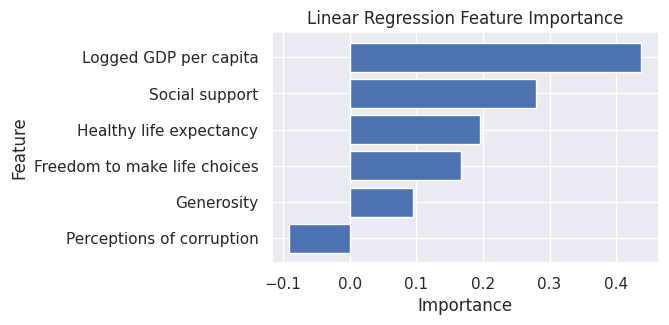

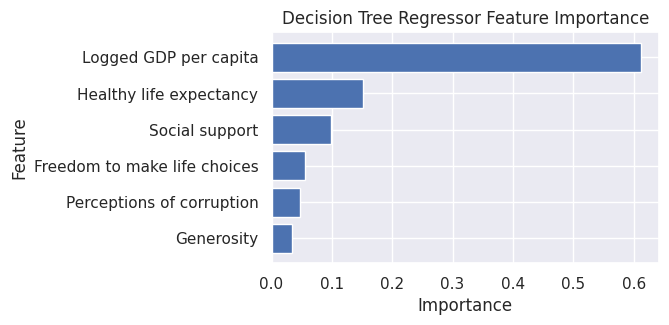

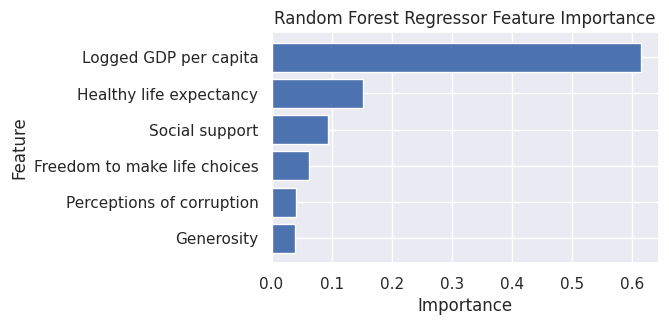

In [62]:
# Plotting the feature importance for Linear Regression
plt.figure(figsize=(5, 3))
plt.barh(linear_feature_importance['Feature'], linear_feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Linear Regression Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# Plotting the feature importance for Decision Tree Regressor
plt.figure(figsize=(5, 3))
plt.barh(decision_tree_feature_importance['Feature'], decision_tree_feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Regressor Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# Plotting the feature importance for Random Forest Regressor
plt.figure(figsize=(5, 3))
plt.barh(random_forest_feature_importance['Feature'], random_forest_feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Regressor Feature Importance')
plt.gca().invert_yaxis()
plt.show()

Use the trained models to make prediction on new similar dataset

In [63]:
# Load the trained pipeline from the file
load_trained_modelLR = joblib.load('trained_modelLR.pkl')
load_trained_modelDTR = joblib.load('trained_modelDTR.pkl')
load_trained_modelRFR = joblib.load('trained_modelRFR.pkl')

# Select rows where the 'year' column is between 2022 and 2024 (We will use the dataset of 2022-2024 to test our trained model)
#whr_df_2022_2024 = whr_df_2022_2024[(whr_df_2022_2024['year'] >= 2022) & (whr_df_2022_2024['year'] <= 2024)]

# Drop not needed features from the new WHR2005-2023 dataframe (2005 till 2023)
whr_df_2022_2024_pred = whr_df_2022_2024.drop(['Ladder score', 'Country name', 'year', 'Regional indicator'], axis=1)
new_target = whr_df_2022_2024['Ladder score']

# Make predictions on the new dataset
new_predictionsLR = load_trained_modelLR.predict(whr_df_2022_2024_pred)
new_predictionsDTR = load_trained_modelDTR.predict(whr_df_2022_2024_pred)
new_predictionsRFR = load_trained_modelRFR.predict(whr_df_2022_2024_pred)

# Calculate evaluation metrics for LinearRegression
new_eval_result_LR = {'MAE': mean_absolute_error(new_target, new_predictionsLR),
                    'MSE': mean_squared_error(new_target, new_predictionsLR),
                    'RMSE': np.sqrt(mean_squared_error(new_target, new_predictionsLR)),
                    'R-squared (R²) Score': r2_score(new_target, new_predictionsLR)
                    }

# Calculate evaluation metrics for DecisionTreeRegressor
new_eval_result_DTR = {'MAE': mean_absolute_error(new_target, new_predictionsDTR),
                    'MSE': mean_squared_error(new_target, new_predictionsDTR),
                    'RMSE': np.sqrt(mean_squared_error(new_target, new_predictionsDTR)),
                    'R-squared (R²) Score': r2_score(new_target, new_predictionsDTR)
                    }

# Calculate evaluation metrics for RandomForestRegressor
new_eval_result_RFR = {'MAE': mean_absolute_error(new_target, new_predictionsRFR),
                    'MSE': mean_squared_error(new_target, new_predictionsRFR),
                    'RMSE': np.sqrt(mean_squared_error(new_target, new_predictionsRFR)),
                    'R-squared (R²) Score': r2_score(new_target, new_predictionsRFR),
                    }

new_eval_results = { 'Linear Regressor' : new_eval_result_LR,
                    'Decision Tree Regressor' : new_eval_result_DTR,
                    'Random Forest Regressor' : new_eval_result_RFR
                    }

# Display evaluation metrics result of the  trained model vs new dataset vs (period: 2022 - 2024)
print("Evaluation result of the new predictions from our trained models: (period: 2022 - 2024)")
new_evaluation_results = pd.DataFrame(new_eval_results)
new_evaluation_results = new_evaluation_results.T
display(new_evaluation_results)

Evaluation result of the new predictions from our trained models: (period: 2022 - 2024)


,MAE,MSE,RMSE,R-squared (R²) Score
Linear Regressor,0.443416,0.356228,0.596848,0.744884
Decision Tree Regressor,0.576327,0.630334,0.793935,0.548580
Random Forest Regressor,0.419947,0.356748,0.597284,0.744511


Retrain the models and compare the result on another similar dataset

In [64]:
# Load the trained pipeline from the file
load_trained_modelLR = joblib.load('trained_modelLR.pkl')
load_trained_modelDTR = joblib.load('trained_modelDTR.pkl')
load_trained_modelRFR = joblib.load('trained_modelRFR.pkl')

# Select rows where the 'year' column is between 2022 and 2024 (We will use the dataset of 2022-2024 to test our trained model)
# This part was commented because i have already filtered the needed year at the previous preprocees at the beginning
#whr_df_2022_2024 = whr_df_2022_2024[(whr_df_2022_2024['year'] >= 2022) & (whr_df_2022_2024['year'] <= 2024)]

# Define the feature and target variables
y_target_new = whr_df_2022_2024['Ladder score']
X_explanatory_new = whr_df_2022_2024.drop(['Ladder score', 'Country name', 'year', 'Regional indicator'], axis=1)

# Split the new features and target
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_explanatory_new, y_target_new, test_size=0.2, random_state=42)

# Fit the pipeline on the new training data
load_trained_modelLR.fit(X_new_train, y_new_train)
load_trained_modelDTR.fit(X_new_train, y_new_train)
load_trained_modelRFR.fit(X_new_train, y_new_train)

# Make predictions on the new test data
new_retrain_predictionsLR = load_trained_modelLR.predict(X_new_test)
new_retrain_predictionsDTR = load_trained_modelDTR.predict(X_new_test)
new_retrain_predictionsRFR = load_trained_modelRFR.predict(X_new_test)

# Calculate evaluation metrics for LinearRegression
retrained_eval_result_LR = {
    'MAE': mean_absolute_error(y_new_test, new_retrain_predictionsLR),
    'MSE': mean_squared_error(y_new_test, new_retrain_predictionsLR),
    'RMSE': np.sqrt(mean_squared_error(y_new_test, new_retrain_predictionsLR)),
    'R-squared (R²) Score': r2_score(y_new_test, new_retrain_predictionsLR)
}

# Calculate evaluation metrics for DecisionTreeRegressor
retrained_eval_result_DTR = {
    'MAE': mean_absolute_error(y_new_test, new_retrain_predictionsDTR),
    'MSE': mean_squared_error(y_new_test, new_retrain_predictionsDTR),
    'RMSE': np.sqrt(mean_squared_error(y_new_test, new_retrain_predictionsDTR)),
    'R-squared (R²) Score': r2_score(y_new_test, new_retrain_predictionsDTR)
}

# Calculate evaluation metrics for RandomForestRegressor
retrained_eval_result_RFR = {
    'MAE': mean_absolute_error(y_new_test, new_retrain_predictionsRFR),
    'MSE': mean_squared_error(y_new_test, new_retrain_predictionsRFR),
    'RMSE': np.sqrt(mean_squared_error(y_new_test, new_retrain_predictionsRFR)),
    'R-squared (R²) Score': r2_score(y_new_test, new_retrain_predictionsRFR),
}

retrained_eval_results = {
    'Linear Regressor': retrained_eval_result_LR,
    'Decision Tree Regressor': retrained_eval_result_DTR,
    'Random Forest Regressor': retrained_eval_result_RFR
}

# Display evaluation metrics result of the  retrained model vs new dataset vs (period: 2022 - 2024)
print("Display evaluation result of the predictions from retrained models: (actual values)")
retrained_eval_results = pd.DataFrame(retrained_eval_results)
retrained_eval_results = retrained_eval_results.T
display(retrained_eval_results)

Display evaluation result of the predictions from retrained models: (actual values)


,MAE,MSE,RMSE,R-squared (R²) Score
Linear Regressor,0.370606,0.243171,0.493124,0.796350
Decision Tree Regressor,0.326161,0.218130,0.467043,0.817322
Random Forest Regressor,0.317600,0.157905,0.397373,0.867758


Validate/Compare the three result

In [65]:
# Display evaluation metrics results of trained models 80/20 split (period: 2005 - 2021)
print("Display evaluation metrics results of trained models 80/20 split (period: 2005 - 2021)")
evaluation_results = pd.DataFrame(evaluation_results)
evaluation_results = evaluation_results.T
display(evaluation_results)
print("\n")

# Display evaluation metrics result of the  trained model vs new dataset vs (period: 2022 - 2024)
print("Display evaluation metrics result of the  trained model vs new dataset vs (period: 2022 - 2024)")
new_evaluation_results = pd.DataFrame(new_eval_results)
new_evaluation_results = new_evaluation_results.T
display(new_evaluation_results)
print("\n")

# Display evaluation metrics result of the  retrained model vs new dataset vs (period: 2022 - 2024)
print("Display evaluation metrics result of the  retrained model vs new dataset vs (period: 2022 - 2024)")
retrained_eval_results = pd.DataFrame(retrained_eval_results)
retrained_eval_results = retrained_eval_results.T
display(retrained_eval_results)

Display evaluation metrics results of trained models 80/20 split (period: 2005 - 2021)


,Linear Regressor,Decision Tree Regressor,Random Forest Regressor
MAE,0.429774,0.432424,0.327803
MSE,0.294701,0.352243,0.177421
RMSE,0.542864,0.593500,0.421213
R-squared (R²) Score,0.742543,0.692274,0.845002




Display evaluation metrics result of the  trained model vs new dataset vs (period: 2022 - 2024)


,MAE,MSE,RMSE,R-squared (R²) Score
Linear Regressor,0.443416,0.356228,0.596848,0.744884
Decision Tree Regressor,0.576327,0.630334,0.793935,0.548580
Random Forest Regressor,0.419947,0.356748,0.597284,0.744511




Display evaluation metrics result of the  retrained model vs new dataset vs (period: 2022 - 2024)


,Linear Regressor,Decision Tree Regressor,Random Forest Regressor
MAE,0.370606,0.326161,0.317600
MSE,0.243171,0.218130,0.157905
RMSE,0.493124,0.467043,0.397373
R-squared (R²) Score,0.796350,0.817322,0.867758


In [66]:
# Feature importance of the new dataset on the 3 Regression Models

# Linear Regression Feature Importance
linear_regressor = load_trained_modelLR.named_steps['regressor']
linear_feature_importance = pd.DataFrame({'Feature': X_explanatory_new.columns,'Importance': linear_regressor.coef_}).sort_values(by='Importance', ascending=False)
# print("Linear Regression Feature Importance:")
# print(linear_feature_importance)

# Decision Tree Regressor Feature Importance
decision_tree_regressor = load_trained_modelDTR.named_steps['regressor']
decision_tree_feature_importance = pd.DataFrame({'Feature': X_explanatory_new.columns,'Importance': decision_tree_regressor.feature_importances_}).sort_values(by='Importance', ascending=False)
# print("\nDecision Tree Regressor Feature Importance:")
# print(decision_tree_feature_importance)

# Random Forest Regressor Feature Importance
random_forest_regressor = load_trained_modelRFR.named_steps['regressor']
random_forest_feature_importance = pd.DataFrame({'Feature': X_explanatory_new.columns,'Importance': random_forest_regressor.feature_importances_}).sort_values(by='Importance', ascending=False)
# print("\nRandom Forest Regressor Feature Importance:")
# print(random_forest_feature_importance)

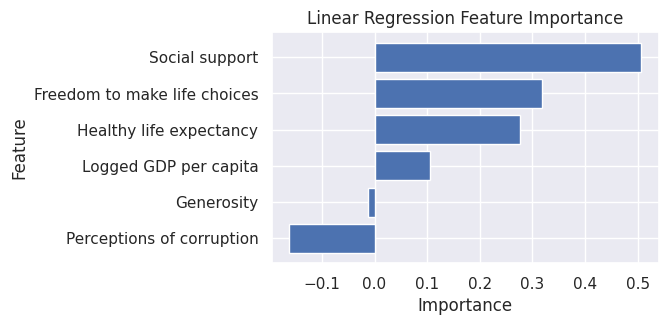

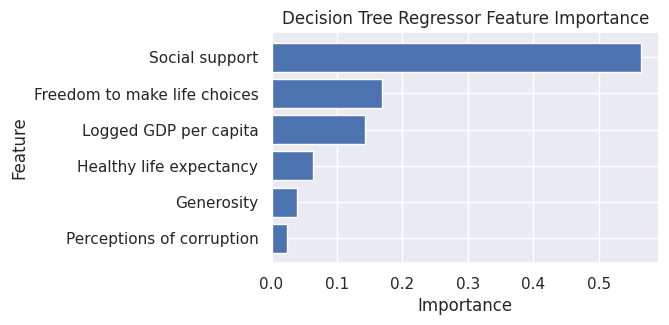

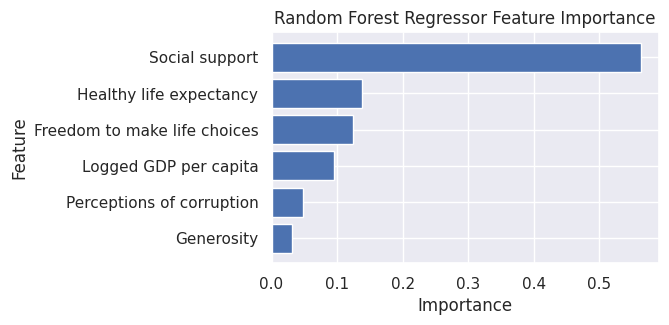

In [67]:
# Plotting the feature importance for Linear Regression
plt.figure(figsize=(5, 3))
plt.barh(linear_feature_importance['Feature'], linear_feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Linear Regression Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# Plotting the feature importance for Decision Tree Regressor
plt.figure(figsize=(5, 3))
plt.barh(decision_tree_feature_importance['Feature'], decision_tree_feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Regressor Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# Plotting the feature importance for Random Forest Regressor
plt.figure(figsize=(5, 3))
plt.barh(random_forest_feature_importance['Feature'], random_forest_feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Regressor Feature Importance')
plt.gca().invert_yaxis()
plt.show()